In [178]:
import uproot
import numpy as np


In [179]:
file1 = uproot.open("dane/700493_mcA_2.root")
file2 = uproot.open("dane/700493_mcD_2.root")
file3 = uproot.open("dane/700493_mcE_2.root")

In [180]:
branches1 = file1['nominal'].arrays(library="np")
branches2 = file2['nominal'].arrays(library="np")
branches3 = file3['nominal'].arrays(library="np")

In [181]:
len(branches1)

90

In [182]:
len(branches2)

90

In [183]:
combined_data = {}

In [184]:
keys = branches1.keys()

In [185]:
keys

dict_keys(['lep_Pt_0', 'lep_E_0', 'lep_Eta_0', 'lep_Phi_0', 'lep_EtaBE2_0', 'lep_sigd0PV_0', 'lep_Z0SinTheta_0', 'lep_d0_0', 'lep_z0_0', 'lep_vz_0', 'lep_deltaz0_0', 'lep_RadiusCO_0', 'lep_RadiusCOX_0', 'lep_RadiusCOY_0', 'lep_SeparationMinDCT_0', 'lep_ClosestSiTracknIL_0', 'lep_ClosestSiTrackeIL_0', 'lep_ClosestSiTracknNIL_0', 'lep_ClosestSiTrackeNIL_0', 'lep_BestMatchTrackEta_0', 'lep_BestMatchTrackPhi_0', 'lep_BestMatchTrackD0_0', 'lep_BestMatchTrackZ0_0', 'lep_BestMatchTrackQ_0', 'lep_ClosestSiTrackEta_0', 'lep_ClosestSiTrackD0_0', 'lep_ClosestSiTrackZ0_0', 'lep_ClosestSiTrackQ_0', 'lep_chargeIDBDTLoose_0', 'lep_Pt_1', 'lep_E_1', 'lep_Eta_1', 'lep_Phi_1', 'lep_EtaBE2_1', 'lep_sigd0PV_1', 'lep_Z0SinTheta_1', 'lep_d0_1', 'lep_z0_1', 'lep_vz_1', 'lep_deltaz0_1', 'lep_RadiusCO_1', 'lep_RadiusCOX_1', 'lep_RadiusCOY_1', 'lep_SeparationMinDCT_1', 'lep_ClosestSiTracknIL_1', 'lep_ClosestSiTrackeIL_1', 'lep_ClosestSiTracknNIL_1', 'lep_ClosestSiTrackeNIL_1', 'lep_BestMatchTrackEta_1', 'lep_Be

In [186]:
keys = list(branches1)

In [187]:
for i in keys:
    combo = np.concatenate([branches1[i], branches2[i], branches3[i]])
    combined_data[i] = combo

In [188]:
len(combined_data[keys[0]])

1363

In [189]:
def minus_value_filter(keys, branch):
    for key in keys:
        min = np.min(branch[key])
        max = np.max(branch[key])
        distance = abs(max - min)
        for i in range(len(branch[key])):
            branch[key][i] = branch[key][i] + distance
    return branch 

In [190]:
minus_value_filter(keys, combined_data)

{'lep_Pt_0': array([8.0292208e+07, 8.0296144e+07, 8.0300168e+07, 8.0334312e+07,
        8.0319840e+07, 8.0333496e+07, 8.0287408e+07, 8.0334440e+07,
        8.0346832e+07, 8.0306776e+07, 8.0405512e+07, 8.0371064e+07,
        8.0314728e+07, 8.0333592e+07, 8.0311640e+07, 8.0309368e+07,
        8.0311456e+07, 8.0322816e+07, 8.0300280e+07, 8.0312952e+07,
        8.0313168e+07, 8.0295112e+07, 8.0509152e+07, 8.0332816e+07,
        8.0296448e+07, 8.0326848e+07, 8.0280408e+07, 8.0333776e+07,
        8.0298120e+07, 8.0316784e+07, 8.0319120e+07, 8.0300792e+07,
        8.0390888e+07, 8.0347592e+07, 8.0595352e+07, 8.0315112e+07,
        8.0446496e+07, 8.0297704e+07, 8.0624176e+07, 8.0312432e+07,
        8.0500208e+07, 8.0350328e+07, 8.0350656e+07, 8.0316872e+07,
        8.0302328e+07, 8.0337592e+07, 8.0391040e+07, 8.0362176e+07,
        8.0383408e+07, 8.0399784e+07, 8.0415952e+07, 8.0470248e+07,
        8.0426944e+07, 8.0295440e+07, 8.0280976e+07, 8.0332248e+07,
        8.0285040e+07, 8.0321208e+07

In [191]:
def norm(keys, branch):
    
    maxes = {}
    mins = {}
    
    for key in keys:
        max = np.max(branch[key])
        min = np.min(branch[key])
        
        
        for i in range(len(branch[key])):
            if max != 0:
                branch[key][i] = branch[key][i] / max
        if(max != 0):
            maxes[key] = max / max    
            mins[key] = min / max
        
        
    return [branch, maxes, mins]

In [192]:
a = norm(keys, combined_data)

In [193]:
a

[{'lep_Pt_0': array([0.50015306, 0.5001776 , 0.50020266, 0.5004154 , 0.5003252 ,
         0.50041026, 0.5001232 , 0.50041616, 0.50049335, 0.50024384,
         0.5008589 , 0.50064427, 0.5002934 , 0.50041085, 0.5002741 ,
         0.50026   , 0.500273  , 0.50034374, 0.5002034 , 0.5002823 ,
         0.50028366, 0.5001712 , 0.5015045 , 0.500406  , 0.5001795 ,
         0.5003689 , 0.5000796 , 0.50041205, 0.5001899 , 0.5003062 ,
         0.50032073, 0.50020653, 0.50076777, 0.50049806, 0.5020414 ,
         0.50029576, 0.5011142 , 0.50018734, 0.502221  , 0.50027907,
         0.50144875, 0.5005151 , 0.5005172 , 0.5003067 , 0.5002161 ,
         0.50043577, 0.5007687 , 0.50058895, 0.5007212 , 0.5008232 ,
         0.50092393, 0.5012621 , 0.50099236, 0.5001732 , 0.50008315,
         0.5004025 , 0.5001084 , 0.5003337 , 0.5011002 , 0.50050926,
         0.50021577, 0.5003809 , 0.5002339 , 0.5005615 , 0.5003335 ,
         0.5004407 , 0.5001683 , 0.50041455, 0.5002887 , 0.5002388 ,
         0.50040615, 0

In [194]:
np.std(combined_data[keys[0]])

0.013532533

In [195]:
import matplotlib.pyplot as plt

In [196]:
keys

['lep_Pt_0',
 'lep_E_0',
 'lep_Eta_0',
 'lep_Phi_0',
 'lep_EtaBE2_0',
 'lep_sigd0PV_0',
 'lep_Z0SinTheta_0',
 'lep_d0_0',
 'lep_z0_0',
 'lep_vz_0',
 'lep_deltaz0_0',
 'lep_RadiusCO_0',
 'lep_RadiusCOX_0',
 'lep_RadiusCOY_0',
 'lep_SeparationMinDCT_0',
 'lep_ClosestSiTracknIL_0',
 'lep_ClosestSiTrackeIL_0',
 'lep_ClosestSiTracknNIL_0',
 'lep_ClosestSiTrackeNIL_0',
 'lep_BestMatchTrackEta_0',
 'lep_BestMatchTrackPhi_0',
 'lep_BestMatchTrackD0_0',
 'lep_BestMatchTrackZ0_0',
 'lep_BestMatchTrackQ_0',
 'lep_ClosestSiTrackEta_0',
 'lep_ClosestSiTrackD0_0',
 'lep_ClosestSiTrackZ0_0',
 'lep_ClosestSiTrackQ_0',
 'lep_chargeIDBDTLoose_0',
 'lep_Pt_1',
 'lep_E_1',
 'lep_Eta_1',
 'lep_Phi_1',
 'lep_EtaBE2_1',
 'lep_sigd0PV_1',
 'lep_Z0SinTheta_1',
 'lep_d0_1',
 'lep_z0_1',
 'lep_vz_1',
 'lep_deltaz0_1',
 'lep_RadiusCO_1',
 'lep_RadiusCOX_1',
 'lep_RadiusCOY_1',
 'lep_SeparationMinDCT_1',
 'lep_ClosestSiTracknIL_1',
 'lep_ClosestSiTrackeIL_1',
 'lep_ClosestSiTracknNIL_1',
 'lep_ClosestSiTrackeNIL_1

In [232]:
def bins(n, list):
    bins = []
    
    list = sorted(list)
    
    last = list[-1]
    k = np.min(list)
    while k < last:
        bins.append(k)
        k += (last - list[0])/n
    
    
    return bins

In [249]:
def cuting(list):
    mean = np.mean(list)
    std = np.std(list)
    
    filtred = []
    
    max_list = []
    min_list = []
    
    max_plus = mean + 5*std
    max_minus = mean - 5*std
    for i in range(len(list)):
        if(list[i] <= max_plus and list[i] >= max_minus):
            filtred.append(list[i])
        elif (list[i] >= max_plus):
          max_list.append(list[i])
        elif (list[i] <= max_minus):
            min_list.append(list[i])
    if (len(max_list) > 0):
        cut_max = np.min(max_list)
    else:
        cut_max = np.max(filtred)
    if(len(min_list) > 0):
        cut_min = np.max(min_list)
    else:
        cut_min = np.min(filtred)
    
    
    return [np.array(filtred), cut_max, cut_min]

In [250]:
test = cuting(combined_data[keys[0]])[0]
test

array([0.50015306, 0.5001776 , 0.50020266, 0.5004154 , 0.5003252 ,
       0.50041026, 0.5001232 , 0.50041616, 0.50049335, 0.50024384,
       0.5008589 , 0.50064427, 0.5002934 , 0.50041085, 0.5002741 ,
       0.50026   , 0.500273  , 0.50034374, 0.5002034 , 0.5002823 ,
       0.50028366, 0.5001712 , 0.5015045 , 0.500406  , 0.5001795 ,
       0.5003689 , 0.5000796 , 0.50041205, 0.5001899 , 0.5003062 ,
       0.50032073, 0.50020653, 0.50076777, 0.50049806, 0.5020414 ,
       0.50029576, 0.5011142 , 0.50018734, 0.502221  , 0.50027907,
       0.50144875, 0.5005151 , 0.5005172 , 0.5003067 , 0.5002161 ,
       0.50043577, 0.5007687 , 0.50058895, 0.5007212 , 0.5008232 ,
       0.50092393, 0.5012621 , 0.50099236, 0.5001732 , 0.50008315,
       0.5004025 , 0.5001084 , 0.5003337 , 0.5011002 , 0.50050926,
       0.50021577, 0.5003809 , 0.5002339 , 0.5005615 , 0.5003335 ,
       0.5004407 , 0.5001683 , 0.50041455, 0.5002887 , 0.5002388 ,
       0.50040615, 0.5004052 , 0.500396  , 0.50019115, 0.50025

In [251]:
biny = bins(100, test)
biny

[0.50006706,
 0.5000885945558547,
 0.5001101338863372,
 0.5001316732168196,
 0.500153212547302,
 0.5001747518777845,
 0.5001962912082669,
 0.5002178305387494,
 0.5002393698692318,
 0.5002609091997142,
 0.5002824485301967,
 0.5003039878606791,
 0.5003255271911615,
 0.500347066521644,
 0.5003686058521264,
 0.5003901451826088,
 0.5004116845130913,
 0.5004332238435737,
 0.5004547631740561,
 0.5004763025045386,
 0.500497841835021,
 0.5005193811655034,
 0.5005409204959859,
 0.5005624598264683,
 0.5005839991569507,
 0.5006055384874332,
 0.5006270778179156,
 0.500648617148398,
 0.5006701564788805,
 0.5006916958093629,
 0.5007132351398453,
 0.5007347744703278,
 0.5007563138008102,
 0.5007778531312926,
 0.5007993924617751,
 0.5008209317922575,
 0.5008424711227399,
 0.5008640104532224,
 0.5008855497837048,
 0.5009070891141872,
 0.5009286284446697,
 0.5009501677751521,
 0.5009717071056345,
 0.500993246436117,
 0.5010147857665994,
 0.5010363250970818,
 0.5010578644275643,
 0.5010794037580467,
 0.50

(array([10., 11., 26., 31., 42., 36., 46., 65., 71., 58., 67., 72., 63.,
        53., 52., 51., 44., 42., 33., 28., 35., 27., 22., 14., 29., 23.,
        23., 11., 10., 11., 11., 10., 10.,  8., 11., 11., 10.,  6.,  7.,
        10.,  8.,  8.,  8.,  8.,  6.,  4.,  3.,  5.,  4.,  3.,  5.,  5.,
         3.,  3.,  0.,  3.,  7.,  7.,  1.,  4.,  1.,  1.,  2.,  4.,  3.,
         3.,  5.,  2.,  0.,  0.,  1.,  2.,  2.,  1.,  1.,  1.,  2.,  0.,
         0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  2.,  0.,  0.,  2.,  1.,
         1.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.]),
 array([0.50006706, 0.50008859, 0.50011013, 0.50013167, 0.50015321,
        0.50017475, 0.50019629, 0.50021783, 0.50023937, 0.50026091,
        0.50028245, 0.50030399, 0.50032553, 0.50034707, 0.50036861,
        0.50039015, 0.50041168, 0.50043322, 0.50045476, 0.5004763 ,
        0.50049784, 0.50051938, 0.50054092, 0.50056246, 0.500584  ,
        0.50060554, 0.50062708, 0.50064862, 0.50067016, 0.5006917 ,
        0.50071324, 0.5007

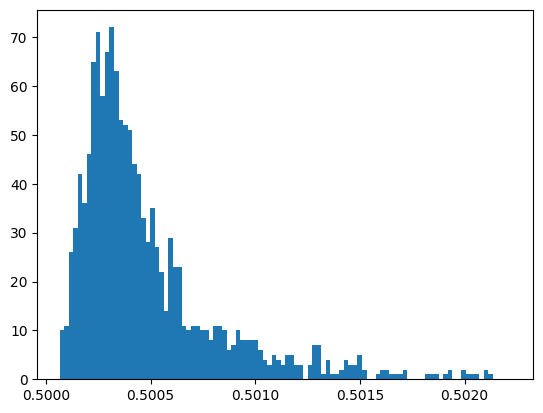

In [252]:
plt.hist(test,bins=biny)

In [253]:
globals_max = {}
globals_min = {}

for key in keys:
    cut = cuting(combined_data[key])
    combined_data[key] = cut[0]
    globals_max[key] = cut[1]
    globals_min[key] = cut[2]

In [254]:
def paint(key, m, list):
    biny = bins(m, list)
    plt.hist(combined_data[key], bins=biny)
    plt.title(key)
    plt.show()

In [ ]:
for i in range(0,90):
    paint(keys[i], 100, combined_data[keys[i]])

In [256]:
globals_min

{'lep_Pt_0': 0.50006706,
 'lep_E_0': 0.500011,
 'lep_Eta_0': 0.33534834,
 'lep_Phi_0': 0.33346847,
 'lep_EtaBE2_0': 0.3331446,
 'lep_sigd0PV_0': 0.3312047,
 'lep_Z0SinTheta_0': 0.4877964,
 'lep_d0_0': 0.61024487,
 'lep_z0_0': 0.3914971,
 'lep_vz_0': 0.0,
 'lep_deltaz0_0': 0.56558925,
 'lep_RadiusCO_0': 0.1933993,
 'lep_RadiusCOX_0': 0.14463256,
 'lep_RadiusCOY_0': 0.18290423,
 'lep_SeparationMinDCT_0': 0.0008941304,
 'lep_ClosestSiTracknIL_0': 0.001994018,
 'lep_ClosestSiTrackeIL_0': 0.000999001,
 'lep_ClosestSiTracknNIL_0': 0.0029850747,
 'lep_ClosestSiTrackeNIL_0': 0.000999001,
 'lep_BestMatchTrackEta_0': 0.3332337,
 'lep_BestMatchTrackPhi_0': 0.3332837,
 'lep_BestMatchTrackD0_0': 0.6401407,
 'lep_BestMatchTrackZ0_0': 0.33962548,
 'lep_BestMatchTrackQ_0': 0.33333334,
 'lep_ClosestSiTrackEta_0': 0.0024420673,
 'lep_ClosestSiTrackD0_0': 0.02002804,
 'lep_ClosestSiTrackZ0_0': 0.080765665,
 'lep_ClosestSiTrackQ_0': 0.000999001,
 'lep_chargeIDBDTLoose_0': 0,
 'lep_Pt_1': 0.50776577,
 'lep

In [257]:
globals_max

{'lep_Pt_0': 0.5022638,
 'lep_E_0': 0.5011139,
 'lep_Eta_0': 1.0,
 'lep_Phi_0': 1.0,
 'lep_EtaBE2_0': 1.0,
 'lep_sigd0PV_0': 1.0,
 'lep_Z0SinTheta_0': 0.89506274,
 'lep_d0_0': 0.6370917,
 'lep_z0_0': 0.83826697,
 'lep_vz_0': 0.0,
 'lep_deltaz0_0': 0.87683463,
 'lep_RadiusCO_0': 1.0,
 'lep_RadiusCOX_0': 1.0,
 'lep_RadiusCOY_0': 1.0,
 'lep_SeparationMinDCT_0': 1.0,
 'lep_ClosestSiTracknIL_0': 1.0,
 'lep_ClosestSiTrackeIL_0': 1.0,
 'lep_ClosestSiTracknNIL_0': 1.0,
 'lep_ClosestSiTrackeNIL_0': 1.0,
 'lep_BestMatchTrackEta_0': 1.0,
 'lep_BestMatchTrackPhi_0': 1.0,
 'lep_BestMatchTrackD0_0': 0.90613365,
 'lep_BestMatchTrackZ0_0': 1.0,
 'lep_BestMatchTrackQ_0': 1.0,
 'lep_ClosestSiTrackEta_0': 1.0,
 'lep_ClosestSiTrackD0_0': 1.0,
 'lep_ClosestSiTrackZ0_0': 1.0,
 'lep_ClosestSiTrackQ_0': 1.0,
 'lep_chargeIDBDTLoose_0': 1,
 'lep_Pt_1': 0.61323524,
 'lep_E_1': 0.8257711,
 'lep_Eta_1': 1.0,
 'lep_Phi_1': 1.0,
 'lep_EtaBE2_1': 1.0,
 'lep_sigd0PV_1': 1.0,
 'lep_Z0SinTheta_1': 0.8988488,
 'lep_d0_1'